In [13]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 
from numpy import nan

In [14]:
f = pd.read_excel('dane.xlsx')

In [30]:
p = [f[f.columns[x]].values.tolist() for x in range(7)]
t=p[-1]
p.remove(t)
k=[[float(str(x)[:-1]) for x in y if str(x) != "nan"] for y in p]

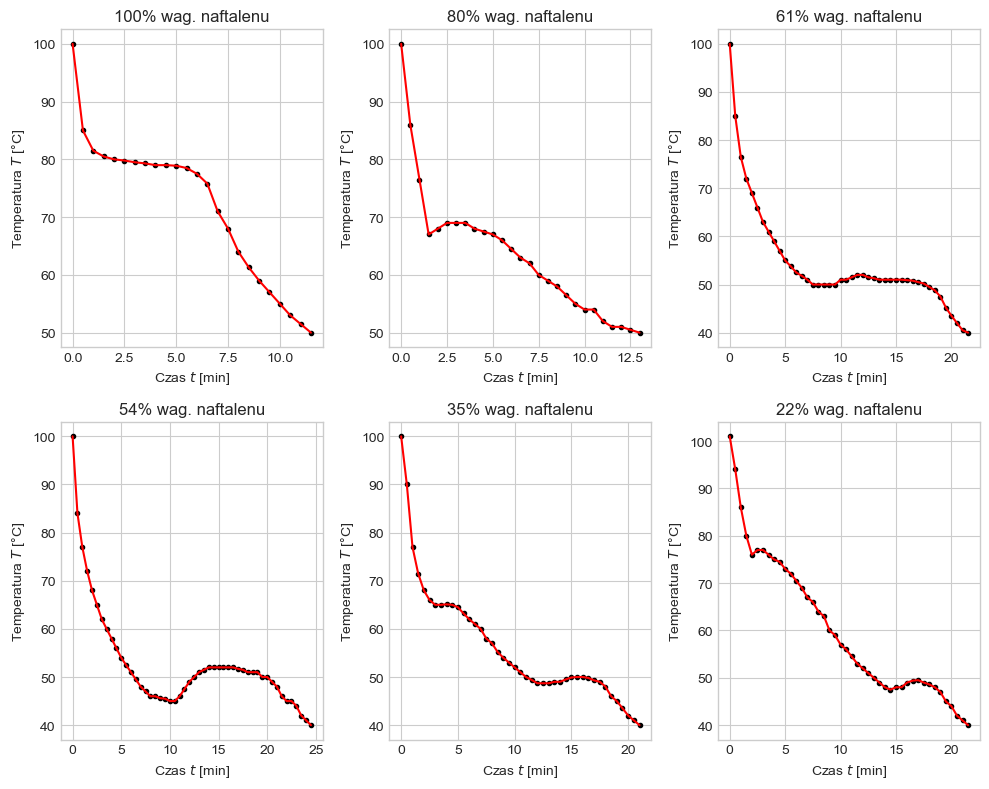

In [31]:
p=k
p[1].pop(3)
tytuły=['100%','80%','61%','54%','35%','22%']
plt.figure(figsize=(10,8))
for i in range(len(p)):
    plt.subplot(2,3,i+1)
    plt.scatter(t[0:len(p[i])],p[i],color='k',marker='.')
    plt.plot(t[0:len(p[i])],p[i],color='r')
    plt.style.use('seaborn-whitegrid')
    plt.xlabel("Czas $t$ [min]")
    plt.ylabel("Temperatura $T$ [°C]")
    plt.title(tytuły[i]+' wag. naftalenu')
    plt.tight_layout()
plt.show()